In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression

import pickle
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,RocCurveDisplay

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MBTI/clean_mbti.csv")

In [ ]:
df['E_I'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)


df['S_N'] = df['type'].apply(lambda x: 1 if x[1] == 'S' else 0)


df['T_F'] = df['type'].apply(lambda x: 1 if x[2] == 'T' else 0)


df['J_P'] = df['type'].apply(lambda x: 1  if x[3] == 'J' else 0)

In [ ]:
df.head(3)

,type,posts,clean_posts,E_I,S_N,T_F,J_P
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,and moments sportscenter not top ten pla...,0,0,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,im finding the lack of me in these posts very ...,1,0,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one course to which i say i know tha...,0,0,1,0


#Training on the Introvert/Extrovert axis
#### Will give us one of the two --Either introvert(I) or extrovert(E)

In [ ]:
dfie = df[['clean_posts','E_I']].copy()  #creating new dfie from existing df to work on introvert extrovert axis

In [ ]:
train_iedata,test_iedata = train_test_split(dfie,test_size=0.2,random_state=42,stratify=dfie.E_I) #splitting data into train and test sets

In [ ]:
train_iedata.E_I.value_counts()  #training data imbalance-->apply SMOTE

0    5341
1    1599
Name: E_I, dtype: int64

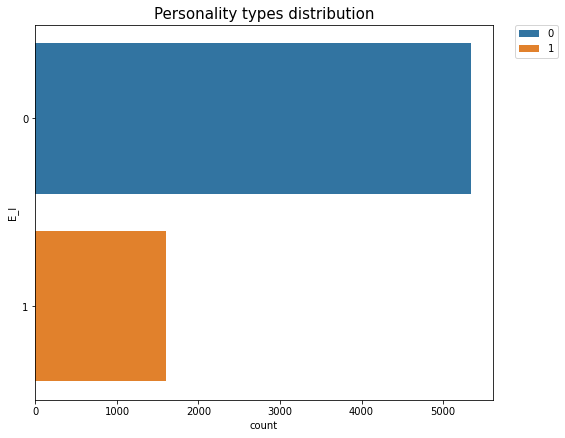

In [ ]:
#sns countplot
plt.figure(figsize=(8,6))
sns.countplot(y='E_I',data=train_iedata,hue='E_I',dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
sns.set_context('talk')
sns.set_theme(style="darkgrid")
plt.tight_layout()
plt.title('Personality types distribution', fontsize=15)
plt.show()

In [ ]:
vectorizer=TfidfVectorizer( max_features=5000,stop_words="english")
vectorizer.fit(train_iedata.clean_posts)                   #learn vocab of the data fit

TfidfVectorizer(max_features=5000, stop_words='english')

In [ ]:
train_post_ie=vectorizer.transform(train_iedata.clean_posts).toarray()
test_post_ie=vectorizer.transform(test_iedata.clean_posts).toarray()

In [ ]:
train_target_ie=np.array(train_iedata.E_I)   
test_target_ie=np.array(test_iedata.E_I)

In [ ]:
#intializing SMOTE 
sm = SMOTE(sampling_strategy="minority",random_state=42)

In [ ]:
train_ie_post_sm,train_ie_target_sm = sm.fit_resample(train_post_ie,train_target_ie)  

In [ ]:
test_ie_post_sm,test_ie_target_sm = sm.fit_resample(test_post_ie,test_target_ie)

In [ ]:
model_log=LogisticRegression(max_iter=300,C=0.5,n_jobs=-1,class_weight='balanced')
model_log.fit(train_ie_post_sm,train_ie_target_sm)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=700, n_jobs=-1)

In [ ]:
#Train report

print('train classification report \n ',classification_report(train_ie_target_sm,model_log.predict(train_ie_post_sm),target_names=['I','E']))

train classification report 
                precision    recall  f1-score   support

           I       0.85      0.86      0.85      5341
           E       0.86      0.84      0.85      5341

    accuracy                           0.85     10682
   macro avg       0.85      0.85      0.85     10682
weighted avg       0.85      0.85      0.85     10682



In [ ]:
#Test report
print('test classification report \n ',classification_report(test_ie_target_sm,model_log.predict(test_ie_post_sm),target_names=['I','E']))

test classification report 
                precision    recall  f1-score   support

           I       0.70      0.82      0.76      1335
           E       0.78      0.65      0.71      1335

    accuracy                           0.74      2670
   macro avg       0.74      0.74      0.73      2670
weighted avg       0.74      0.74      0.73      2670



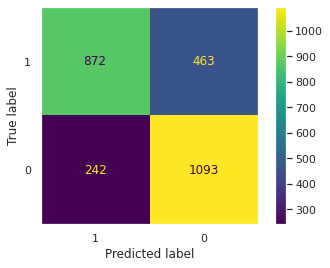

In [ ]:
ConfusionMatrixDisplay.from_predictions(test_ie_target_sm, model_log.predict(test_ie_post_sm),labels=[1,0])
plt.grid(False)
plt.show()

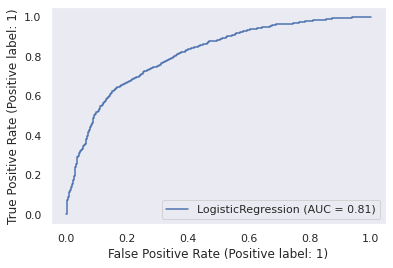

In [ ]:
RocCurveDisplay.from_estimator(model_log,test_ie_post_sm,test_ie_target_sm)
plt.grid(False)
plt.show()

In [ ]:
savedModel1 = '/content/drive/MyDrive/testingForMBTI/lr_ie.pkl'
pickle.dump(model_log,open(savedModel1,'wb'))

#Training on the Sensing/Intuition axis
#### Will give us one of the two --Either Sensing(S) or Intuition(N)

In [ ]:
dfsn = df[['clean_posts','S_N']].copy()

In [ ]:
train_sndata,test_sndata = train_test_split(dfsn,test_size=0.2,random_state=42,stratify=dfsn.S_N)

In [ ]:
train_sndata.S_N.value_counts() #training data imbalanced -->apply SMOTE

0    5982
1     958
Name: S_N, dtype: int64

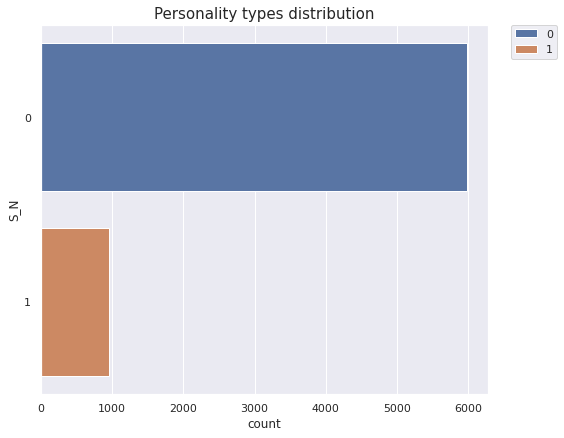

In [ ]:
#sns countplot
plt.figure(figsize=(8,6))
sns.countplot(y='S_N',data=train_sndata,hue='S_N',dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
sns.set_context('talk')
sns.set_theme(style="darkgrid")
plt.tight_layout()
plt.title('Personality types distribution', fontsize=15)
plt.show()

In [ ]:
vectorizer_2 =TfidfVectorizer(max_features=5000,stop_words="english")
vectorizer_2.fit(train_sndata.clean_posts)  

TfidfVectorizer(max_features=5000, stop_words='english')

In [ ]:
train_post_sn=vectorizer_2.transform(train_sndata.clean_posts).toarray()  #x_train
test_post_sn=vectorizer_2.transform(test_sndata.clean_posts).toarray()    #x_test

In [ ]:
#encoding S/N                                    
train_target_sn=np.array(train_sndata.S_N)         #y_train
test_target_sn=np.array(test_sndata.S_N)           #y_test

In [ ]:
train_sn_post_sm, train_sn_target_sm = sm.fit_resample(train_post_sn,train_target_sn)
# new X_train,     Y_train

In [ ]:
test_sn_post_sm, test_sn_target_sm = sm.fit_resample(test_post_sn,test_target_sn)

In [ ]:
model_log_sn = LogisticRegression(max_iter=300,C=0.5,n_jobs=-1,class_weight='balanced')
model_log_sn.fit(train_sn_post_sm,train_sn_target_sm)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=300, n_jobs=-1)

In [ ]:
#Train report

print('train classification report \n ',classification_report(train_sn_target_sm,model_log_sn.predict(train_sn_post_sm),target_names=['N','S']))

train classification report 
                precision    recall  f1-score   support

           N       0.89      0.90      0.89      5982
           S       0.90      0.89      0.89      5982

    accuracy                           0.89     11964
   macro avg       0.89      0.89      0.89     11964
weighted avg       0.89      0.89      0.89     11964



In [ ]:
#Test report
print('test classification report \n ',classification_report(test_sn_target_sm,model_log_sn.predict(test_sn_post_sm),target_names=['N','S']))

test classification report 
                precision    recall  f1-score   support

           N       0.63      0.86      0.73      1496
           S       0.78      0.50      0.61      1496

    accuracy                           0.68      2992
   macro avg       0.70      0.68      0.67      2992
weighted avg       0.70      0.68      0.67      2992



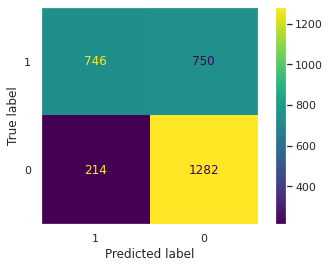

In [ ]:
ConfusionMatrixDisplay.from_predictions(test_sn_target_sm, model_log_sn.predict(test_sn_post_sm),labels=[1,0])
plt.grid(False)
plt.show()

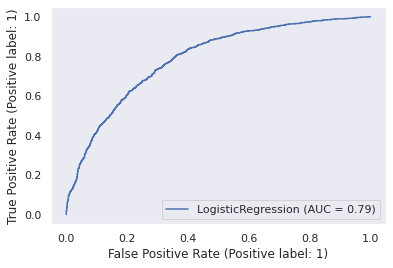

In [ ]:
RocCurveDisplay.from_estimator(model_log_sn,test_sn_post_sm,test_sn_target_sm)
plt.grid(False)
plt.show()

In [ ]:
savedModel2 = '/content/drive/MyDrive/testingForMBTI/lr_sn.pkl'
pickle.dump(model_log_sn,open(savedModel2,'wb'))

##Training on the Thinkers/Feelers axis
#### Will give us one of the two --Either Thinkkers(T) or Feelers(F)

In [ ]:
dftf = df[['clean_posts','T_F']].copy()

In [ ]:
train_tfdata,test_tfdata = train_test_split(dftf,test_size=0.2,random_state=42,stratify=dftf.T_F)

In [ ]:
train_tfdata.T_F.value_counts()  #train data not imbalanced-->no need to apply SMOTE 

0    3755
1    3185
Name: T_F, dtype: int64

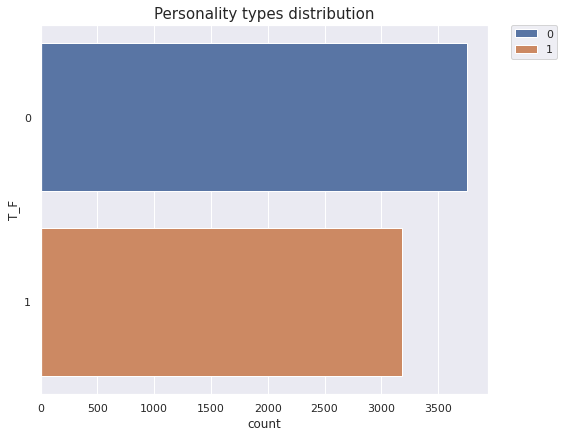

In [ ]:
#sns countplot
plt.figure(figsize=(8,6))
sns.countplot(y='T_F',data=train_tfdata,hue='T_F',dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
sns.set_context('talk')
sns.set_theme(style="darkgrid")
plt.tight_layout()
plt.title('Personality types distribution', fontsize=15)
plt.show()

In [ ]:
vectorizer_3 =TfidfVectorizer(max_features=5000,stop_words="english")
vectorizer_3.fit(train_tfdata.clean_posts)  

TfidfVectorizer(max_features=5000, stop_words='english')

In [ ]:
train_post_tf=vectorizer_3.transform(train_tfdata.clean_posts).toarray()  #x_train
test_post_tf=vectorizer_3.transform(test_tfdata.clean_posts).toarray()    #x_test

In [ ]:
#encoding T/F                                  
train_target_tf=np.array(train_tfdata.T_F)         #y_train
test_target_tf=np.array(test_tfdata.T_F)           #y_test

In [ ]:
model_log_tf = LogisticRegression(max_iter=300,C=0.5,n_jobs=-1,class_weight='balanced')
model_log_tf.fit(train_post_tf,train_target_tf)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=300, n_jobs=-1)

In [ ]:
#Train report

print('train classification report \n ',classification_report(train_target_tf,model_log_tf.predict(train_post_tf),target_names=['F','T']))

train classification report 
                precision    recall  f1-score   support

           F       0.88      0.83      0.85      3755
           T       0.81      0.86      0.84      3185

    accuracy                           0.85      6940
   macro avg       0.85      0.85      0.85      6940
weighted avg       0.85      0.85      0.85      6940



In [ ]:
#Test report
print('test classification report \n ',classification_report(test_target_tf,model_log_tf.predict(test_post_tf),target_names=['F','T']))

test classification report 
                precision    recall  f1-score   support

           F       0.84      0.78      0.81       939
           T       0.76      0.82      0.79       796

    accuracy                           0.80      1735
   macro avg       0.80      0.80      0.80      1735
weighted avg       0.80      0.80      0.80      1735



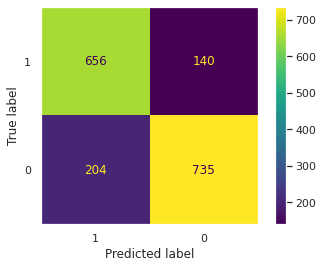

In [ ]:
ConfusionMatrixDisplay.from_predictions(test_target_tf, model_log_tf.predict(test_post_tf),labels=[1,0])
plt.grid(False)
plt.show()

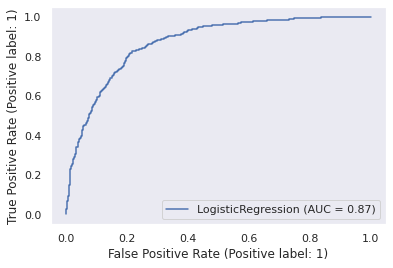

In [ ]:
RocCurveDisplay.from_estimator(model_log_tf,test_post_tf,test_target_tf)
plt.grid(False)
plt.show()

In [ ]:
savedModel3 = '/content/drive/MyDrive/testingForMBTI/lr_tf.pkl'
pickle.dump(model_log_tf,open(savedModel3,'wb'))

#Training on the Judgers/Perceivers axis
#### Will give us one of the two --Either Judgers(J) or Perceivers(P)

In [ ]:
dfjp = df[['clean_posts','J_P']].copy()

In [ ]:
dfjp.head(3)

,clean_posts,J_P
0,and moments sportscenter not top ten pla...,1
1,im finding the lack of me in these posts very ...,0
2,good one course to which i say i know tha...,0


In [ ]:
train_jpdata,test_jpdata = train_test_split(dfjp,test_size = 0.2,random_state=42,stratify=dfjp.J_P)

In [ ]:
train_jpdata.J_P.value_counts() #not too imbalanced--->do not apply SMOTE

0    4193
1    2747
Name: J_P, dtype: int64

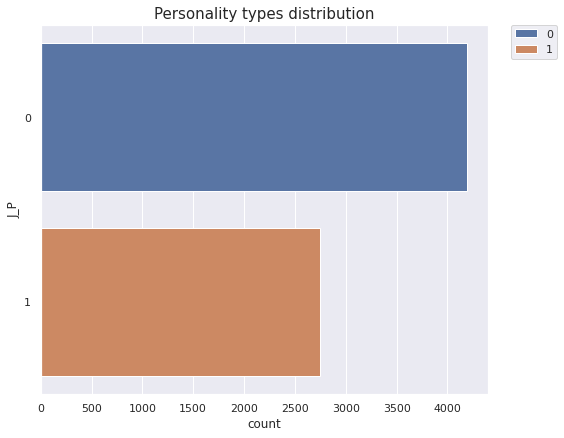

In [ ]:
#sns countplot
plt.figure(figsize=(8,6))
sns.countplot(y='J_P',data=train_jpdata,hue='J_P',dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
sns.set_context('talk')
sns.set_theme(style="darkgrid")
plt.tight_layout()
plt.title('Personality types distribution', fontsize=15)
plt.show()

In [ ]:
vectorizer_4 =TfidfVectorizer(max_features=5000,stop_words="english")
vectorizer_4.fit(train_jpdata.clean_posts)  

TfidfVectorizer(max_features=5000, stop_words='english')

In [ ]:
train_post_jp=vectorizer_4.transform(train_jpdata.clean_posts).toarray()  #x_train
test_post_jp=vectorizer_4.transform(test_jpdata.clean_posts).toarray()    #x_test

In [ ]:
#encoding J/P                                
train_target_jp=np.array(train_jpdata.J_P)         #y_train
test_target_jp=np.array(test_jpdata.J_P)           #y_test

In [ ]:
model_log_jp = LogisticRegression(max_iter=300,C=0.5,n_jobs=-1,class_weight='balanced')
model_log_jp.fit(train_post_jp,train_target_jp)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=300, n_jobs=-1)

In [ ]:
#Train report

print('train classification report \n ',classification_report(train_target_jp,model_log_jp.predict(train_post_jp),target_names=['P','J']))

train classification report 
                precision    recall  f1-score   support

           P       0.85      0.78      0.82      4193
           J       0.70      0.79      0.74      2747

    accuracy                           0.79      6940
   macro avg       0.78      0.79      0.78      6940
weighted avg       0.79      0.79      0.79      6940



In [ ]:
#Test report

print('test classification report \n ',classification_report(test_target_jp,model_log_jp.predict(test_post_jp),target_names=['P','J']))

test classification report 
                precision    recall  f1-score   support

           P       0.73      0.67      0.70      1048
           J       0.55      0.62      0.58       687

    accuracy                           0.65      1735
   macro avg       0.64      0.65      0.64      1735
weighted avg       0.66      0.65      0.66      1735



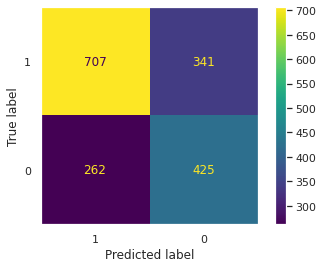

In [ ]:
ConfusionMatrixDisplay.from_predictions(test_target_jp, model_log_jp.predict(test_post_jp),display_labels=[1,0])
plt.grid(False)
plt.show()

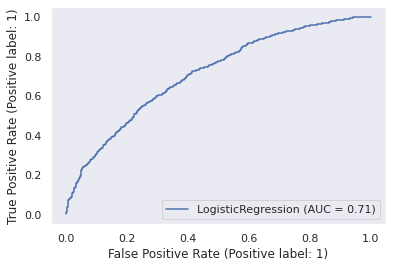

In [ ]:
RocCurveDisplay.from_estimator(model_log_jp,test_post_jp,test_target_jp)
plt.grid(False)
plt.show()

In [ ]:
savedModel4 = '/content/drive/MyDrive/testingForMBTI/lr_jp.pkl'
pickle.dump(model_log_jp,open(savedModel4,'wb'))

In [ ]:
path1 = '/content/drive/MyDrive/testingForMBTI/tfidf/vec1.pkl'
pickle.dump(vectorizer,open(path1,'wb'))

path2 = '/content/drive/MyDrive/testingForMBTI/tfidf/vec2.pkl'
pickle.dump(vectorizer_2,open(path2,'wb'))

path3 = '/content/drive/MyDrive/testingForMBTI/tfidf/vec3.pkl'
pickle.dump(vectorizer_3,open(path3,'wb'))

path4 = '/content/drive/MyDrive/testingForMBTI/tfidf/vec4.pkl'
pickle.dump(vectorizer_4,open(path4,'wb'))

#Testing

In [ ]:
text1 = pd.Series(["I like going out and talking to people.It's very exciting to me.I have a lot of friends and i enjoy their company."])
text2 = pd.Series(['I like being practical about things.I consider myself a very realistic person.'])
text3 = pd.Series(['I like to follow my heart when making decisions.My emotions takes precendence'])
text4 = pd.Series(['I am a person who follow rules and does not like being spontaneous.I prefer planning ahead.'])

In [ ]:
new = vectorizer.transform(text1)

In [ ]:
new_sn = vectorizer_2.transform(text2)

In [ ]:
new_tf = vectorizer_3.transform(text3)

In [ ]:
new_jp = vectorizer_4.transform(text4)

In [ ]:
model_log.predict_proba(new)      #  0 --> I , 1-->E

array([[0.49830459, 0.50169541]])

In [ ]:
model_log_sn.predict(new_sn)   #  0 --> N , 1-->S

array([1])

In [ ]:
model_log_tf.predict_proba(new_tf)   #  0 --> F , 1-->T

array([[0.34346726, 0.65653274]])

In [ ]:
model_log_jp.predict(new_jp)   #  0 --> P , 1-->J

array([0])